## Import Python Librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data

In [2]:
X_train = np.array([0.765,0.838,0.329,0.277,0.45,0.833,0.44,0.634,0.351,0.784,0.589,0.816,0.352,0.591,0.04,0.38,0.816,0.732,0.32,0.597,0.908,0.146,0.691,0.75,0.568,0.866,0.705,0.027,0.607,0.793,0.864,0.057,0.877,0.164,0.729,0.291,0.324,0.745,0.158,0.098,0.113,0.794,0.452,0.765,0.983,0.001,0.474,0.773,0.155,0.875,])
Y_train = np.array([6.322,6.254,3.224,2.87,4.177,6.267,4.088,5.737,3.379,6.334,5.381,6.306,3.389,5.4,1.704,3.602,6.306,6.254,3.157,5.446,5.918,2.147,6.088,6.298,5.204,6.147,6.153,1.653,5.527,6.332,6.156,1.766,6.098,2.236,6.244,2.96,3.183,6.287,2.205,1.934,1.996,6.331,4.188,6.322,5.368,1.561,4.383,6.33,2.192,6.108,])
X_val = np.array([0.329,0.528,0.323,0.952,0.868,0.931,0.69,0.112,0.574,0.421,0.972,0.715,0.7,0.58,0.69,0.163,0.093,0.695,0.493,0.243,0.928,0.409,0.619,0.011,0.218,0.647,0.499,0.354,0.064,0.571,0.836,0.068,0.451,0.074,0.158,0.571,0.754,0.259,0.035,0.595,0.245,0.929,0.546,0.901,0.822,0.797,0.089,0.924,0.903,0.334,])
Y_val = np.array([3.221,4.858,3.176,5.617,6.141,5.769,6.081,1.995,5.259,3.932,5.458,6.193,6.129,5.305,6.081,2.228,1.912,6.106,4.547,2.665,5.791,3.829,5.619,1.598,2.518,5.826,4.603,3.405,1.794,5.23,6.26,1.81,4.18,1.832,2.208,5.234,6.306,2.759,1.684,5.432,2.673,5.781,5.019,5.965,6.295,6.329,1.894,5.816,5.951,3.258,])

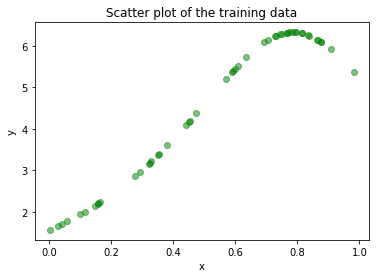

In [3]:
# Graphically display our training data
plt.scatter(X_train, Y_train, color='green', alpha=0.5)
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

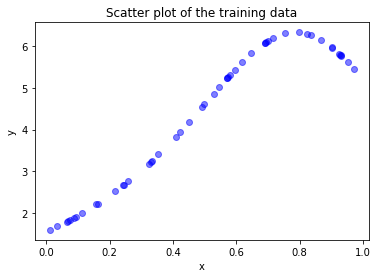

In [4]:
# Graphically display our validation data
plt.scatter(X_val, Y_val, color='blue', alpha=0.5)
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Build the artificial neural-network

In [5]:
ANN_ARCHITECTURE = [
    {"input_dim": 1, "output_dim": 8, "activation": "relu"},
    {"input_dim": 8, "output_dim": 8, "activation": "relu"},
    {"input_dim": 8, "output_dim": 1, "activation": "none"},
]

In [6]:
def init_parameters(ann_architecture):
   
    # number of layers in our neural network
    number_of_layers = len(ann_architecture)
    
    # parameters storage initiation
    params_values = {}
    
    # iteration over network layers
    for idx, layer in enumerate(ann_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        
        # extracting the number of units in layers
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        # initiating the values of the W matrix
        # and vector b for subsequent layers
        params_values['W' + str(layer_idx)] = np.random.randn(
            layer_output_size, layer_input_size) * 0.1
        params_values['b' + str(layer_idx)] = np.random.randn(
            layer_output_size, 1) * 0.1
        
    return params_values

In [7]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

### Single layer forward propagation step

$$\boldsymbol{Z}^{[l]} = \boldsymbol{W}^{[l]} \cdot \boldsymbol{A}^{[l-1]} + \boldsymbol{b}^{[l]}$$

$$\boldsymbol{A}^{[l]} = g^{[l]}(\boldsymbol{Z}^{[l]})$$

In [8]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation):
    
    # calculation of the input value for the activation function
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    # selection of activation function
    if activation is "none":
        return Z_curr, Z_curr
    elif activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    # return of calculated activation A and the intermediate Z matrix
    return activation_func(Z_curr), Z_curr

In [9]:
def full_forward_propagation(X, params_values, ann_architecture):
    # creating a temporary memory to store the information needed for a backward step
    memory = {}
    # X vector is the activation for layer 0 
    A_curr = X
    
    # iteration over network layers
    for idx, layer in enumerate(ann_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # transfer the activation from the previous iteration
        A_prev = A_curr
        
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        
        # extraction of W for the current layer
        W_curr = params_values["W" + str(layer_idx)]
        # extraction of b for the current layer
        b_curr = params_values["b" + str(layer_idx)]
        # calculation of activation for the current layer
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        # saving calculated values in the memory
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

In [10]:
def get_cost_value(Y_hat, Y):
    cost = Y_hat - Y
    return np.squeeze(cost)

In [11]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation):
    
    # selection of activation function
    if activation is "none":
        backward_activation_func = relu_backward
        
        dZ_curr = dA_curr

    else:
        if activation is "relu":
            backward_activation_func = relu_backward
        elif activation is "sigmoid":
            backward_activation_func = sigmoid_backward
        else:
            raise Exception('Non-supported activation function')
        
        # calculation of the activation function derivative
        dZ_curr = backward_activation_func(dA_curr, Z_curr)

    # derivative of the matrix W
    dW_curr = np.dot(dZ_curr, A_prev.T)
    
    # derivative of the vector b
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True)
    
    # derivative of the matrix A_prev
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

In [12]:
def full_backward_propagation(Y_hat, Y, memory, params_values, ann_architecture):
    
    grads_values = {}
    
    # number of examples
    m = Y.shape[1]
    
    # a hack ensuring the same shape of the prediction vector and labels vector
    Y = Y.reshape(Y_hat.shape)
    
    # initiation of gradient descent algorithm
    dA_prev = Y_hat - Y
    
    for layer_idx_prev, layer in reversed(list(enumerate(ann_architecture))):
        
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]    
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, activ_function_curr)
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

In [13]:
def update(params_values, grads_values, ann_architecture, learning_rate, m):

    # iteration over network layers
    for layer_idx, layer in enumerate(ann_architecture, 1):
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)] / m     
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)] / m

    return params_values;

In [14]:
def train(X, Y, ann_architecture, params_values, learning_rate, verbose=False, callback=None):
    # initiation of neural net parameters
    
    # initiation of lists storing the history 
    # of metrics calculated during the learning process 
    cost_history = []
    
    # performing calculations for subsequent iterations
    Y_hat, memory = full_forward_propagation(X, params_values, ann_architecture)
        
    # calculating metrics and saving them in history
    cost = get_cost_value(Y_hat, Y)
    cost_history.append(cost)
       
    # step backward - calculating gradient
    grads_values = full_backward_propagation(Y_hat, Y, memory, params_values, ann_architecture)
    
    # updating model state
    m = X.shape[0] # m is number of samples in the batch
    params_values = update(params_values, grads_values, ann_architecture, learning_rate, m)
        
    return params_values

In [15]:
X_train = X_train.reshape(X_train.shape[0], 1)

In [16]:
Y_train = Y_train.reshape(Y_train.shape[0], 1)

## Train the artificial neural-network model

In [17]:
# Training
params_values = init_parameters(ANN_ARCHITECTURE)

# implementation of the stochastic gradient descent
EPOCHS = 2000
for epoch in range(EPOCHS):
    samples_per_batch = 1
    
    for i in range(int(X_train.shape[0]/samples_per_batch)):
        si = i * samples_per_batch
        sj = (i + 1) * samples_per_batch

        params_values = train(
            np.transpose(X_train[si:sj]), 
            np.transpose(Y_train[si:sj]),
            ANN_ARCHITECTURE, 
            params_values, 
            0.02) 

In [18]:
# Prediction
Ŷ_train, _ = full_forward_propagation(np.transpose(X_train), params_values, ANN_ARCHITECTURE)

In [19]:
# Accuracy achieved on the test set
cost_train = get_cost_value(Ŷ_train, np.transpose(Y_train.reshape((Y_train.shape[0], 1))))
cost_train.mean()

0.019761679165306478

## Evaluate the model

In [20]:
X_val = X_val.reshape(X_val.shape[0], 1)
Ŷ_val, _ = full_forward_propagation(np.transpose(X_val), params_values, ANN_ARCHITECTURE)
Ŷ_val

array([[3.22847732, 4.86051399, 3.18363129, 5.7079624 , 6.1163279 ,
        5.81005378, 6.18910666, 1.97820266, 5.2377687 , 3.98298674,
        5.61073252, 6.38499098, 6.27111856, 5.28697584, 6.18910666,
        2.27297054, 1.86541403, 6.23011261, 4.57347237, 2.73392183,
        5.82463826, 3.88457247, 5.60682222, 1.65556587, 2.59085748,
        5.83645552, 4.6226795 , 3.43350705, 1.7152065 , 5.21316513,
        6.25332997, 1.71970768, 4.22902242, 1.74592212, 2.24407173,
        5.21316513, 6.34255479, 2.82325252, 1.68257295, 5.40999368,
        2.74508816, 5.81977676, 5.0081354 , 5.9558986 , 6.26856347,
        6.29576616, 1.84025784, 5.84408423, 5.94617561, 3.26948327]])

## Infer new output data

In [21]:
X_test = np.array([0., 0.2, 0.4, 0.6, 0.8, 1.0])
X_test = X_test.reshape(X_test.shape[0], 1)
Ŷ_test, _ = full_forward_propagation(np.transpose(X_test), params_values, ANN_ARCHITECTURE)
Ŷ_test

array([[1.64318763, 2.48682175, 3.81076176, 5.45099962, 6.29250184,
        5.47461069]])

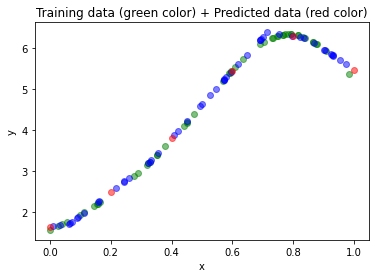

In [22]:
# Display training data and predicted data graphically
plt.title('Training data (green color) + Predicted data (red color)')

# training data in green color
plt.scatter(X_train, Y_train, color='green',  alpha=0.5)

# validation data in blue color
plt.scatter(X_val, Ŷ_val, color='blue',  alpha=0.5)

# predicted data in blue color
plt.scatter(X_test, Ŷ_test, color='red',  alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()